# DAND - Data Wrangling
## WeRateDogs Twitter Analysis
Tom Schonig, February 26th 2019

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv',encoding='utf-8')
image_predictions_clean = pd.read_csv('image_predictions_clean.csv',encoding='utf-8')
twitter_archive_master['intercept'] = 1

### A Doggo By Any Other Name
As an ethusiastic dog owner, I've been caught calling my pup innumerate, unintelligible nicknames. The phenomena of 'doggos', 'puppers', etc, have also led to countless hours of meme-entertainment. So I was curious if there's any meaningiful correlation between these silly, fun-loving names and social media engagement - or, if 'a dog is a dog is a dog' (our null hypothesis: there's no difference between the terms used, and each dog will have roughly equivalent engagement).

Thankfully, the WeRateDogs dataset provided for this project made an attempt to break these out where each dog is described as either a 'doggo', 'pupper', 'floofer', or 'puppo'. We can examine and quantify these relationships using multiple linear regression. We'll use an alpha value of 0.15 to test our null hypothesis (while a low threshold for scientific studies, easing this makes sense since we're having fun looking at dog tweets).

#### Favorite / Likes

In [3]:
lm = sm.OLS(twitter_archive_master['favorite_count'],twitter_archive_master[['intercept','floofer','puppo','pupper']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.00
Date:                Tue, 26 Feb 2019   Prob (F-statistic):           3.66e-07
Time:                        18:42:21   Log-Likelihood:                -22685.
No. Observations:                2089   AIC:                         4.538e+04
Df Residuals:                    2085   BIC:                         4.540e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8751.4606    294.784     29.688      0.000    8173.359    9329.562
floofer     2406.7394   3994.296      0.603      0.547   -5426.484    1.02e+04
puppo       1.394e+04   2588.118      5.388      0.000    8868.224     1.9e+04
pupper     -1492.3077    883.064     -1.690      0.091   -3224.086     239.471
==============================================================================
Omnibus:                     1938.172   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90122.881
Skew:                           4.323   Prob(JB):                         0.00
Kurtosis:                      33.994   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Retweets

In [4]:
lm = sm.OLS(twitter_archive_master['retweet_count'],twitter_archive_master[['intercept','floofer','puppo','pupper']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.750
Date:                Tue, 26 Feb 2019   Prob (F-statistic):           0.000157
Time:                        18:42:21   Log-Likelihood:                -20619.
No. Observations:                2089   AIC:                         4.125e+04
Df Residuals:                    2085   BIC:                         4.127e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2674.3352    109.669     24.386      0.000    2459.263    2889.407
floofer     1157.7648   1486.003      0.779      0.436   -1756.439    4071.969
puppo       4172.9148    962.861      4.334      0.000    2284.646    6061.184
pupper      -254.1474    328.527     -0.774      0.439    -898.423     390.128
==============================================================================
Omnibus:                     2705.471   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           557057.703
Skew:                           6.995   Prob(JB):                         0.00
Kurtosis:                      81.767   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Surprisingly, we see some significant correlations in both favorites and retweets.
    - 'puppos' are more likely to be favorited and retweeted than vanilla 'doggos' (both favorite and retweet p=0.00)
    - 'puppers' are less likely to be favorited than 'doggos' (favorite p=0.09)

## Can the WeRateDogs Ratings Predict User Engagement?


Much of the charm of WeRateDogs comes from its biased rating system, which consistently rates dogs higher than 10/10. There are also persistent jokes on the account with non-dogs scoring lowly, and some pups scoring really well for arbitrary reasons. Do these ratings actually relate to increased user engagement? Do their scores actually matter?

We can start by taking a quick look at their scoring ratios (numerator / denominator) against their favorite / like interactions. During our wrangling of the dataset, we found two tweets with extreme outlier Dog Score values that conformed to our validation rules, so we'll remove them before statistical analyses.

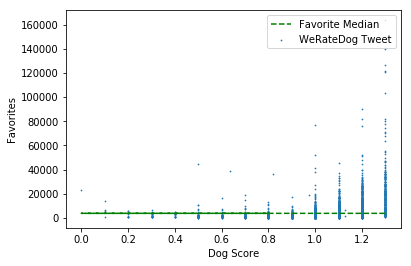

In [53]:
upper_bound = twitter_archive_master.dog_score.quantile(0.99)
without_outliers = twitter_archive_master[twitter_archive_master.dog_score < upper_bound]
x = without_outliers['dog_score']
y = without_outliers['favorite_count']
y_med = [np.median(y)]*len(x)
fig,ax = plt.subplots()
scatter = ax.scatter(x,y,label='WeRateDog Tweet',s=0.5)
median = ax.plot(x,y_med,label='Favorite Median',linestyle='--',color='g')
legend = ax.legend(loc='upper right')
plt.xlabel('Dog Score')
plt.ylabel('Favorites')
plt.show()

At a glance, we can see that their most engaging tweets (highest favorites) do contain their highest scores as well. Furthermore, there appears to be a slight slope to the upper right of the plot, suggesting that higher scoring doggos tend to score better with the general public as well. We can test this relationship with linear regression to see if this relationishp actually exists (and whether its signifigant), or if we're just seeing patterns of no real relevance.

We assume, by default, that there is no significant and persistent effect throughout the dataset - that is, a higher rating given to a dog does not lead to higher user engagement (all else equal). We alternatively hypothesize that a higher dog rating leads to more favoriting / liking by end-users. We will accept the alternate with an alpha threshold of 0.05.

In [44]:
lm = sm.OLS(twitter_archive_master['favorite_count'],twitter_archive_master[['intercept','dog_score']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9353
Date:                Tue, 26 Feb 2019   Prob (F-statistic):              0.334
Time:                        19:12:29   Log-Likelihood:                -22701.
No. Observations:                2089   AIC:                         4.541e+04
Df Residuals:                    2087   BIC:                         4.542e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8680.8135    289.284     30.008      0.000    8113.498    9248.129
dog_score     67.6295     69.929      0.967      0.334     -69.508     204.767
==============================================================================
Omnibus:                     1961.996   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95072.709
Skew:                           4.395   Prob(JB):                         0.00
Kurtosis:                      34.859   Cond. No.                         4.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With an r-score of 0 and p-value of 0.334, we continue to accept that the actual rating WeRateDogs gives to each pupper does not, in fact, significantly influence their user-engagement.

### Do Dogs Even Matter?

Answer: Of course they do!! But the account also posts plenty of ratings, where the poor creature being judged isn't even a dog! Talk about being held to an impossible standard.

As part of the project, Udacity provided the output from a neural network that evaluated each tweet and tried to make predictions about what was in the image - including whether the photo was of a dog or not. We can use these predictions to see if the account's jokes had any effect on user engagement.

As before, our default assumption is that these jokes had no real impact on user engagement - their audience were no more or less inclined to favorite a tweet based on the joke. We alternatively hypothesize that it matters whether they post a dog or not, and set an alpha threshold for acceptance at 0.50.

In [82]:
merged_dfs = twitter_archive_master.set_index('tweet_id').join(image_predictions_clean.set_index('tweet_id'))
merged_dfs = merged_dfs[merged_dfs.is_predicted_dog.notnull()]
merged_dfs[['not_dog','is_dog']] = pd.get_dummies(merged_dfs['is_predicted_dog'])

In [83]:
lm = sm.OLS(merged_dfs['favorite_count'],merged_dfs[['intercept','not_dog']])
result= lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.76
Date:                Tue, 26 Feb 2019   Prob (F-statistic):           0.000609
Time:                        19:49:58   Log-Likelihood:                -64210.
No. Observations:                5904   AIC:                         1.284e+05
Df Residuals:                    5902   BIC:                         1.284e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9084.8559    193.685     46.905      0.000    8705.163    9464.549
not_dog    -1300.9462    379.358     -3.429      0.001   -2044.627    -557.265
==============================================================================
Omnibus:                     5510.408   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274639.346
Skew:                           4.440   Prob(JB):                         0.00
Kurtosis:                      35.211   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With a p-value well within our threshold (0.001 < 0.500), we reject the null hypothesis and now hold our findings with significance. All else equal, the non-dog photos should average 1301 fewer favorites.